<a href="https://colab.research.google.com/github/Amrutha-Tsavatapalli/ACM-work/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import pickle
import os
import sys
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from joblib import dump
# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
# to play the audio files
from IPython.display import Audio
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("uwrfkaggler/ravdess-emotional-speech-audio")
print("Path to dataset files:", path)

100%|██████████| 429M/429M [00:03<00:00, 123MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/uwrfkaggler/ravdess-emotional-speech-audio/versions/1


In [ ]:
import os
Ravdess = "/root/.cache/kagglehub/datasets/uwrfkaggler/ravdess-emotional-speech-audio/versions/1"
ravdess_directory_list = os.listdir(Ravdess)


In [ ]:
import os

# Define the correct dataset path
Ravdess = "/root/.cache/kagglehub/datasets/uwrfkaggler/ravdess-emotional-speech-audio/versions/1"

# Get list of all actor directories
ravdess_directory_list = [d for d in os.listdir(Ravdess) if os.path.isdir(os.path.join(Ravdess, d))]

file_emotion = []
file_path = []

# Loop through each actor directory
for dir in ravdess_directory_list:
    actor_path = os.path.join(Ravdess, dir)  # Correct path joining
    actor_files = os.listdir(actor_path)  # Get list of files in actor directory

    for file in actor_files:
        if file.endswith(".wav"):  # Ensure we only process WAV files
            part = file.split('.')[0].split('-')  # Extract emotion part
            file_emotion.append(int(part[2]))  # 3rd part contains the emotion
            file_path.append(os.path.join(actor_path, file))  # Correct file path

# Check if files are collected correctly
print("Total files found:", len(file_path))
print("First few file paths:", file_path[:5])
print("First few emotions:", file_emotion[:5])


Total files found: 1440
First few file paths: ['/root/.cache/kagglehub/datasets/uwrfkaggler/ravdess-emotional-speech-audio/versions/1/Actor_13/03-01-02-01-02-01-13.wav', '/root/.cache/kagglehub/datasets/uwrfkaggler/ravdess-emotional-speech-audio/versions/1/Actor_13/03-01-04-02-02-02-13.wav', '/root/.cache/kagglehub/datasets/uwrfkaggler/ravdess-emotional-speech-audio/versions/1/Actor_13/03-01-03-01-02-02-13.wav', '/root/.cache/kagglehub/datasets/uwrfkaggler/ravdess-emotional-speech-audio/versions/1/Actor_13/03-01-08-01-02-01-13.wav', '/root/.cache/kagglehub/datasets/uwrfkaggler/ravdess-emotional-speech-audio/versions/1/Actor_13/03-01-07-02-02-02-13.wav']
First few emotions: [2, 4, 3, 8, 7]


In [ ]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df],axis=1)

# changing integers to actual emotions.
Ravdess_df['Emotions'].replace([1,2,3,4,5,6,7,8],['neutral','calm','happy','sad','angry','fear','disgust','surprise'], inplace=True)
Ravdess_df.head(10)

<ipython-input-6-976548469470>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Ravdess_df['Emotions'].replace([1,2,3,4,5,6,7,8],['neutral','calm','happy','sad','angry','fear','disgust','surprise'], inplace=True)


,Emotions,Path
0,calm,/root/.cache/kagglehub/datasets/uwrfkaggler/ra...
1,sad,/root/.cache/kagglehub/datasets/uwrfkaggler/ra...
2,happy,/root/.cache/kagglehub/datasets/uwrfkaggler/ra...
3,surprise,/root/.cache/kagglehub/datasets/uwrfkaggler/ra...
4,disgust,/root/.cache/kagglehub/datasets/uwrfkaggler/ra...
5,fear,/root/.cache/kagglehub/datasets/uwrfkaggler/ra...
6,happy,/root/.cache/kagglehub/datasets/uwrfkaggler/ra...
7,sad,/root/.cache/kagglehub/datasets/uwrfkaggler/ra...
8,surprise,/root/.cache/kagglehub/datasets/uwrfkaggler/ra...
9,disgust,/root/.cache/kagglehub/datasets/uwrfkaggler/ra...


In [ ]:
##Preprocessing
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=data, sr=sampling_rate, n_steps=int(pitch_factor))

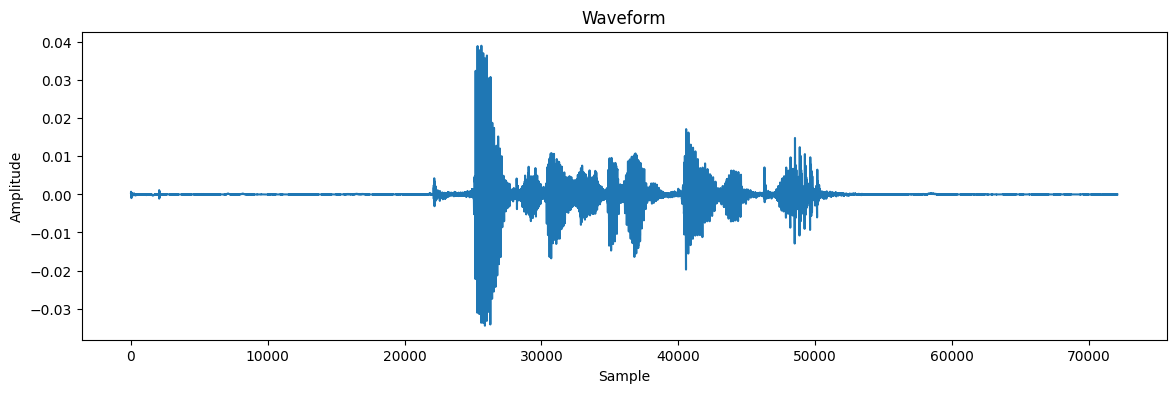

In [ ]:
import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio
import os

# Correct base path
base_path = "/root/.cache/kagglehub/datasets/uwrfkaggler/ravdess-emotional-speech-audio/versions/1"

# Find the first audio file dynamically
for root, _, files in os.walk(base_path):
    for file in files:
        if file.endswith(".wav"):
            audio_path = os.path.join(root, file)
            break  # Take the first found file

# Load and visualize
data, sample_rate = librosa.load(audio_path)

plt.figure(figsize=(14, 4))
plt.plot(data)
plt.title('Waveform')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

# Play the audio
Audio(audio_path)


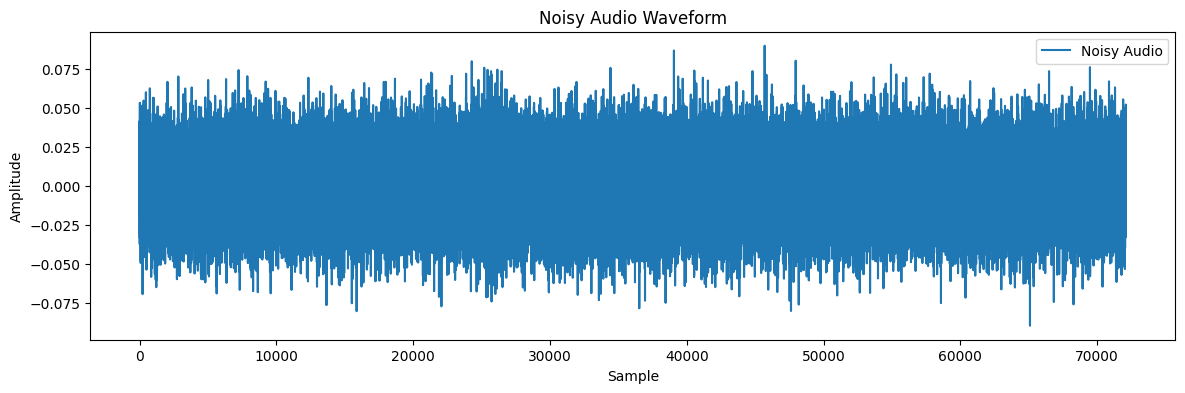

In [ ]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

# Correct dataset path
base_path = "/root/.cache/kagglehub/datasets/uwrfkaggler/ravdess-emotional-speech-audio/versions/1"

# Find the first available audio file
audio_path = None
for root, _, files in os.walk(base_path):
    for file in files:
        if file.endswith(".wav"):
            audio_path = os.path.join(root, file)
            break  # Use the first found audio file

if audio_path is None:
    raise FileNotFoundError("No .wav files found in the dataset directory!")

# Load the audio
data, sample_rate = librosa.load(audio_path)

# Noise injection function
def add_noise(audio, noise_level=0.02):
    noise = np.random.randn(len(audio)) * noise_level
    return audio + noise

# Apply noise injection
noisy_data = add_noise(data)

# Plot the waveform
plt.figure(figsize=(14, 4))
plt.plot(noisy_data, label="Noisy Audio")
plt.title("Noisy Audio Waveform")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

# Play the noisy audio
Audio(noisy_data, rate=sample_rate)


/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=141
  warnings.warn(


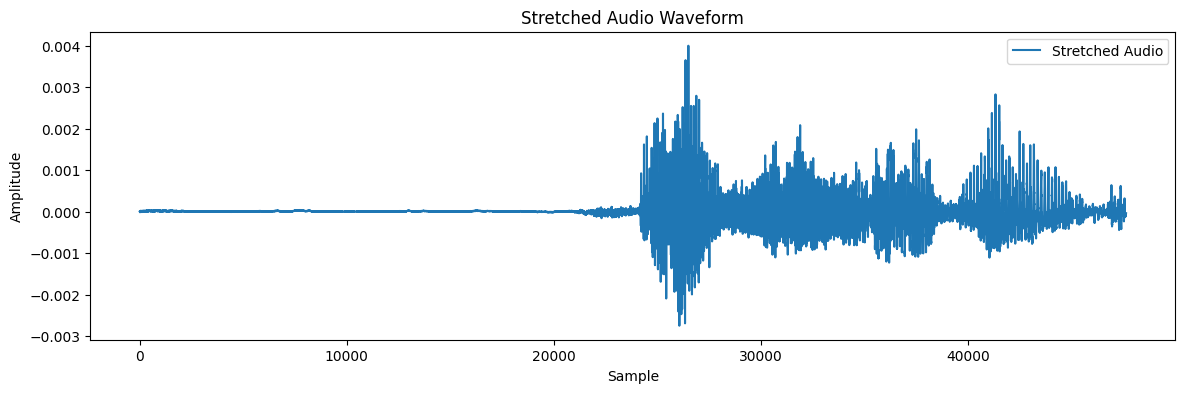

In [ ]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

# Correct dataset path
base_path = "/root/.cache/kagglehub/datasets/uwrfkaggler/ravdess-emotional-speech-audio/versions/1"

# Find the first available audio file
audio_path = None
for root, _, files in os.walk(base_path):
    for file in files:
        if file.endswith(".wav"):
            audio_path = os.path.join(root, file)
            break  # Use the first found audio file

if audio_path is None:
    raise FileNotFoundError("No .wav files found in the dataset directory!")

# Load the audio file
data, sample_rate = librosa.load(audio_path)

# Convert to Short-Time Fourier Transform (STFT) for processing
stft_data = librosa.stft(data)

# Apply time stretching on the spectrogram
stretched_stft = librosa.effects.time_stretch(np.abs(stft_data), rate=1.5)  # Speed up by 1.5x

# Convert back to waveform using Inverse STFT
stretched_data = librosa.istft(stretched_stft)

# Plot the waveform
plt.figure(figsize=(14, 4))
plt.plot(stretched_data, label="Stretched Audio")
plt.title("Stretched Audio Waveform")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

# Play the stretched audio
Audio(stretched_data, rate=sample_rate)


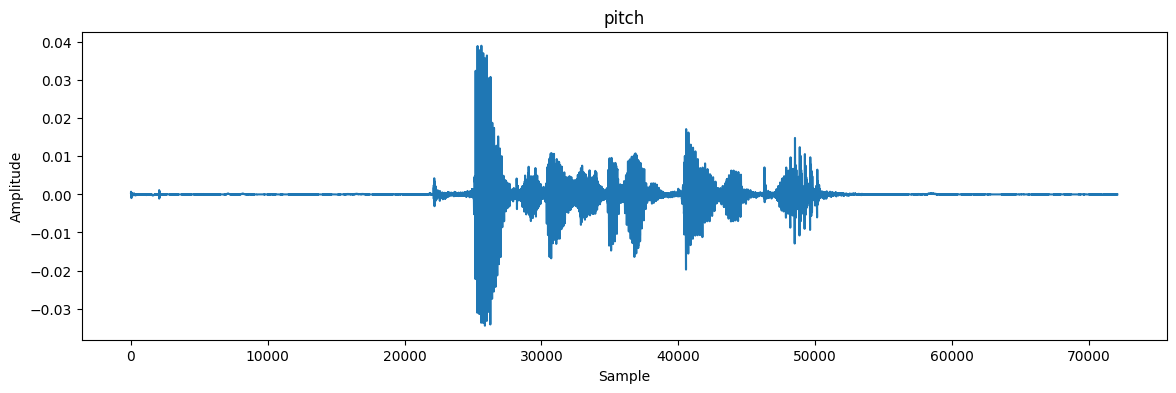

In [ ]:
#4.Pitch
x = pitch(data, sample_rate)
data, sample_rate = librosa.load(audio_path)

# Plot waveform
plt.figure(figsize=(14, 4))
plt.plot(x)
plt.title('pitch')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

#Audio preview
Audio(audio_path)


In [ ]:
def extract_features(data, sample_rate):
    result = np.array([])  # Initialize result as an empty array
    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms))

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel))

    # ZCR
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result = np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    #contrast
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    result = np.hstack((result, contrast))


    return result

In [ ]:
def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # without augmentation
    res1 = extract_features(data,sample_rate)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data,sample_rate)
    result = np.vstack((result, res2)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch,sample_rate)
    result = np.vstack((result, res3)) # stacking vertically

    return result

In [ ]:
X, Y = [], []
for path, emotion in zip(Ravdess_df.Path, Ravdess_df.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)
    #print(path)

In [ ]:
Features = pd.DataFrame(X)
Features['Emotions'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,Emotions
0,-684.627747,80.946228,13.438811,13.097553,12.069611,3.999606,-0.452873,-7.806800,-7.298568,1.669321,...,0.793831,0.742745,19.263548,12.603082,15.897251,14.529692,16.464362,17.356395,45.171158,calm
1,-586.024603,56.754588,12.133134,9.055588,7.160173,2.119500,-3.086687,-8.763836,-7.486134,-0.644311,...,0.793060,0.754914,17.911182,12.269522,16.527544,14.621159,15.556154,15.674356,14.259303,calm
2,-726.908875,84.347557,14.272905,12.416736,11.928945,3.939331,-0.918647,-9.103644,-7.970024,2.394498,...,0.738860,0.676063,20.515353,13.582248,16.909320,15.936928,17.790952,18.475023,45.809301,calm
3,-681.550415,75.953285,23.913692,16.193796,13.042436,5.108761,-2.210888,-3.470309,-2.358575,-3.797325,...,0.757423,0.656784,20.340931,14.673540,16.808320,14.652221,16.310902,15.796361,44.878817,sad
4,-486.864167,32.334838,19.030915,9.755805,3.901674,1.569536,-4.074282,-5.004420,-4.789921,-5.201316,...,0.803062,0.766227,16.704619,13.999605,15.376374,13.373787,13.999105,13.710266,13.671559,sad


In [ ]:
#Encoding output vector
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [ ]:
X = Features.drop('Emotions',axis=1).values
Y = Features['Emotions'].values

In [ ]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True,stratify=Y)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 169), (3240,), (1080, 169), (1080,))

In [ ]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 169), (3240,), (1080, 169), (1080,))

In [ ]:
##Training,Predition
#Random Forest
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)
# Predict and evaluate
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.7454


In [ ]:
#Generating Classification Report
accuracy = metrics.accuracy_score(y_test,y_pred)
report = metrics.classification_report(y_test, y_pred)  # Generating classification report
print(f"The Accuracy Score With Linear Kernel is: {accuracy}")
print(f"The classification Report: \n{report}")

The Accuracy Score With Linear Kernel is: 0.7453703703703703
The classification Report: 
              precision    recall  f1-score   support

       angry       0.84      0.72      0.77       144
        calm       0.69      0.89      0.78       144
     disgust       0.66      0.83      0.74       144
        fear       0.84      0.73      0.78       144
       happy       0.71      0.69      0.70       144
     neutral       0.81      0.64      0.71        72
         sad       0.75      0.67      0.71       144
    surprise       0.76      0.74      0.75       144

    accuracy                           0.75      1080
   macro avg       0.76      0.74      0.74      1080
weighted avg       0.75      0.75      0.74      1080



In [ ]:
#Prediton on test data
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred
df['Actual Labels'] = y_test
df.head(10)

,Predicted Labels,Actual Labels
0,calm,calm
1,surprise,angry
2,angry,angry
3,calm,calm
4,calm,calm
5,surprise,surprise
6,calm,calm
7,fear,fear
8,happy,happy
9,fear,fear


In [ ]:
##Saving the model
#saving file as .pkl file
with open('sound_emotion.pkl', 'wb') as f:  # open a text file
    pickle.dump(model, f) # serialize the list
f.close()